In [1]:
import pandas as pd
import numpy as np
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import datasets as ds
from matplotlib import pyplot as plt
from sklearn import model_selection as ms

/tmp/ipykernel_125896/8518295.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Dados sintéticos

In [2]:
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# dataset
X, y = ds.make_classification(
                        n_samples= n_samples,
                        n_features= n_features,
                        n_informative= n_informative,
                        n_redundant= n_redundant,
                        random_state=n_samples
)
# production dataset
X, X_prod, y, y_prod =  ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

## Não há separação dos dados

In [3]:
# define model
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X, y)

# classification sobre os dados de treinamento
yhat = model.predict(X)

acc = mt.accuracy_score(y, yhat)

print( f'Accuracy Over Training: {acc}')

Accuracy Over Training: 1.0


## Publicação do Modelo em Produção

In [4]:
yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print( f'Accuracy Over Production: {acc_prod}')

Accuracy Over Production: 0.93375


# 2.0 Estratégia Treino-Validacao-Test

In [5]:
# Separação os dados em Treinamento e Teste
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

# Separação entre Treino e Validação
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

## Escolha de parâmetro do algoritmo

In [6]:
# Modelo trinado e validado com o dataset de Trinamento
values = [i for i in range(1, 60)]
train_scores, val_scores = list(), list()

for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    # Previsão sobre os dados de treinamento
    yhat_train = model.predict(X_train)
    acc_train = mt.accuracy_score(y_train, yhat_train)

    train_scores.append(acc_train)

    # Previsão sobre os dados de test
    yhat_val = model.predict(X_val)
    acc_val = mt.accuracy_score(y_val ,yhat_val)

    val_scores.append(acc_val)

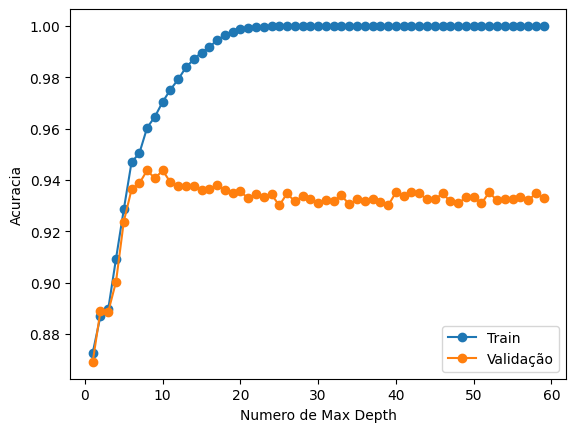

In [7]:
# plot of train and test score vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, val_scores, '-o', label='Validação')
plt.xlabel('Numero de Max Depth')
plt.ylabel('Acuracia')
plt.legend()
plt.show()

In [9]:
# Modelo trinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier(max_depth=4)
model_last.fit(X_train, y_train)

# Previsão sobre os dados de treinamento
yhat_train = model_last.predict(X_train)
acc_train = mt.accuracy_score(y_train, yhat_train)
print(f"Accuracy Over Training: {acc_train}")

# Previsão sobre os dados de validação 
yhat_val = model_last.predict(X_val)
acc_val = mt.accuracy_score(y_val, yhat_val)
print(f"Accuracy Over Validacao: {acc_val}")

# Previsão sobre os dados de test
yhat_test = model_last.predict(X_test)
acc_test = mt.accuracy_score(y_test, yhat_test)
print(f"Accuracy Over Testing: {acc_test}")

# Previsão sobre os dados de produção
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)
print(f"Accuracy Over Produção: {acc_prod}")


Accuracy Over Training: 0.909375
Accuracy Over Validacao: 0.900390625
Accuracy Over Testing: 0.9009375
Accuracy Over Produção: 0.90125
